## 6.4.1 오버피팅

- Author: Heeseo Lim (Mary)

In [3]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

from ch3.mnist import load_mnist

In [4]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [5]:
x_train = x_train[:300]
t_train = t_train[:300]

In [6]:
network = MultiLayerNet(input_size=784,
              hidden_size_list=[100, 100, 100, 100, 100, 100],
              output_size=10)
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 1. 학습
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    # 2. 학습 경과 기록
    # loss = network.loss(x_batch, t_batch)
    # train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        epoch_cnt += 1

        # 3. 정확도 계산
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

    
        
        if epoch_cnt >= max_epochs:
            break


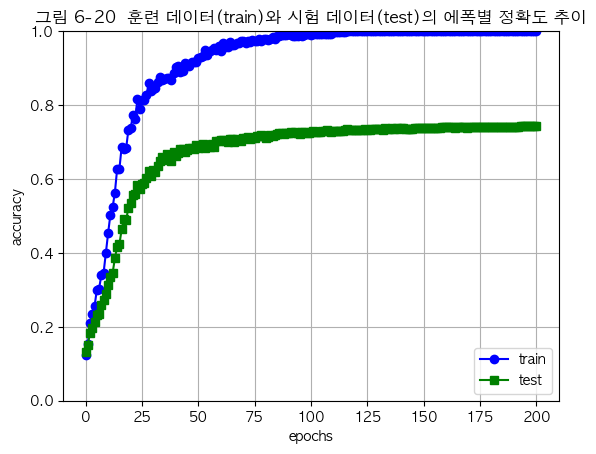

In [7]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Mac용)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 에폭 수
epochs = range(len(train_acc_list))

# 그래프 그리기
plt.plot(epochs, train_acc_list, marker='o', label='train', color='blue')
plt.plot(epochs, test_acc_list, marker='s', label='test', color='green')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.title("그림 6-20  훈련 데이터(train)와 시험 데이터(test)의 에폭별 정확도 추이")
plt.grid(True)
plt.show()


## 드롭아웃

In [8]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):  
        # 학습 모드가 아닐 때는 드롭아웃을 적용하지 않음
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio 
            # x와 같은 shape의 mask 생성-> 그 값이 dropout_ratio보다 큰 경우만 True
            
            return x * self.mask
        
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask